## Guía 3 - Inpterpolación

### Problema 1: Polonomios de Lagrange

- Utilice la interpolación de Lagrange para encontrar el polinomio único p 3 (x), de grado ≤ 3, que concuerda con los siguientes datos:

In [24]:
xi = [-1,0,1,2];
yi = [3,-4, 5, 6];

- Cálculo: Realice manualmente los cálculos, y grafique el polinomio p 3 (x) con polyval, y verifique que pasa por los puntos datos (utilice scatter).

In [25]:
c = [];
c(1) = (1/6)*(-yi(1)+yi(4)) + (1/2)*(yi(2)-yi(3));
c(2) = (1/2)*(yi(1)+yi(3)) - yi(2);
c(3) = -yi(1)/3 - yi(2)/2 + yi(3) - yi(4)/6;
c(4) = yi(2);

In [26]:
c

c =

  -4   8   5  -4



In [27]:
x =-1:0.01:2;

y = polyval(c,x);

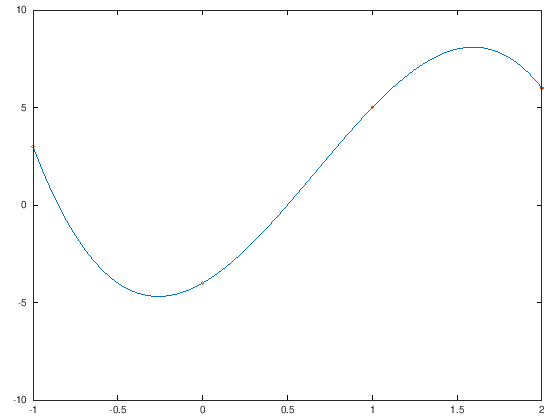

In [28]:
plot(x,y)
hold on;
scatter(xi,yi)

- Análisis del Error: 

**a)** Repita el cálculo para f(x) = ln(x), es decir, obtenga primero el polinomio p3(x) que pasa por los puntos dados en la Tabla.

In [29]:
# valores de la tabla
xi = [0.4, 0.5, 0.7, 0.8];
yi = [-0.916291,-0.693147, -0.356675, -0.223144];

Primero calculo la parte del denominador de cada polinomio de Laggrange, Li:

In [30]:
dL = [];
dL(1) = (xi(1)-xi(2)) * (xi(1)-xi(3)) * (xi(1)-xi(4));
dL(2) = (xi(2)-xi(1)) * (xi(2)-xi(3)) * (xi(2)-xi(4));
dL(3) = (xi(3)-xi(1)) * (xi(3)-xi(2)) * (xi(3)-xi(4));
dL(4) = (xi(4)-xi(1)) * (xi(4)-xi(2)) * (xi(4)-xi(3));
dL

dL =

  -0.0120000   0.0060000  -0.0060000   0.0120000



In [31]:
# multiplican x^3
L11 = 1/dL(1);
L21 = 1/dL(2);
L31 = 1/dL(3);
L41 = 1/dL(4);

In [32]:
# multiplican x^2
L12 = -(xi(2)+xi(3)+xi(4))/dL(1);
L22 = -(xi(1)+xi(3)+xi(4))/dL(2);
L32 = -(xi(1)+xi(2)+xi(4))/dL(3);
L42 = -(xi(1)+xi(2)+xi(3))/dL(4);

In [33]:
# multiplican x
L13 = (xi(2)*xi(3) + xi(3)*xi(4) + xi(2)*xi(4))/dL(1);
L23 = (xi(1)*xi(3) + xi(3)*xi(4) + xi(1)*xi(4))/dL(2);
L33 = (xi(1)*xi(2) + xi(2)*xi(4) + xi(1)*xi(4))/dL(3);
L43 = (xi(1)*xi(2) + xi(2)*xi(3) + xi(1)*xi(3))/dL(4);

In [34]:
# coef independientes
L14 = -xi(2)*xi(3)*xi(4)/dL(1);
L24 = -xi(1)*xi(3)*xi(4)/dL(2);
L34 = -xi(1)*xi(2)*xi(4)/dL(3);
L44 = -xi(1)*xi(2)*xi(3)/dL(4);

In [35]:
# ahora armo el vector de coeficientes
c = [];
c(1) = L11*yi(1) + L21*yi(2) + L31*yi(3) + L41*yi(4);
c(2) = L12*yi(1) + L22*yi(2) + L32*yi(3) + L42*yi(4);
c(3) = L13*yi(1) + L23*yi(2) + L33*yi(3) + L43*yi(4);
c(4) = L14*yi(1) + L24*yi(2) + L34*yi(3) + L44*yi(4);

- **b)** luego grafique la función, y el polinomio interpolante global en [0.4, 0.8];

In [36]:
# dominio
x = 0.4:0.01:0.8;

In [37]:
# ahora calculo el polinomio interpolante global
p3 = polyval(c,x);

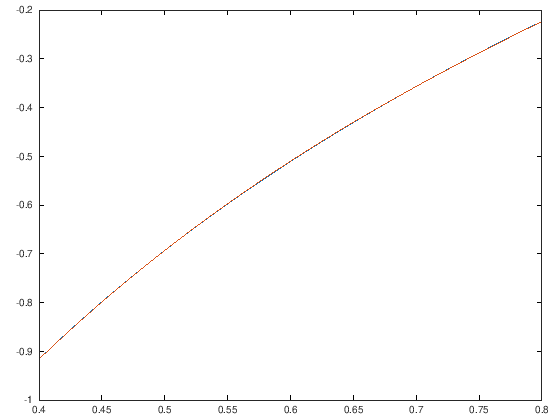

In [38]:
# ahora grafico ambas
plot(x,log(x),x,p3)

**c)** evalue el error en x = 0.6. Recuerde que al aplicar la fórmula del error vista en los apuntes, la derivada de mayor orden se evalua en un punto, por lo gral, desconocido. Es común aproximar ese punto en la forma $\xi=(xa + xb )/2$. El cálculo por fórmula es:

$$err(x) = \upsilon_{n+1}(x)\frac{f^{n+1}(\xi)}{(n+1)!}$$

donde $$\upsilon_{n+1}(x) = (x-x_1)*(x-x_2)...(x-x_{n+1})$$


In [39]:
x=0.6;
u = (x-xi(1))*(x-xi(2))*(x-xi(3))*(x-xi(4));
fac4 = 24;
ep=(xi(1)+xi(4))/2;
deriv4 = -6/(ep^4);

err_manual = u*deriv4/fac4

err_manual = -0.00077160


- **d)** compare la evaluación del error por fórmula con la diferencia exacta entre p3(0.6) - ln(0.6).

In [40]:
p3_0_6 = polyval(c,0.6);
err_exacto= log(0.6) - p3_0_6

err_exacto = -0.00085012


**e)**

In [1]:
# 0 < x < 2
h = 1;
xi = [0, 1, 2];
f = tanh(xi);

In [2]:
# con esta funcion me retorna los 3 polonomios de lagrange de grado 2 para el vector x
function [L1,L2,L3]=lagr2(x,x1,x2,x3)
     L1= (x-x2).*(x-x3)/((x1-x2)*(x1-x3));
     L2= (x-x1).*(x-x3)/((x2-x1)*(x2-x3));
     L3= (x-x1).*(x-x2)/((x3-x1)*(x3-x2));
endfunction

In [3]:
xx = 0:0.01:2;
[L1, L2, L3] = lagr2(xx,xi(1),xi(2),xi(3));
p2 = L1*f(1) + L2*f(2) + L3*f(3);

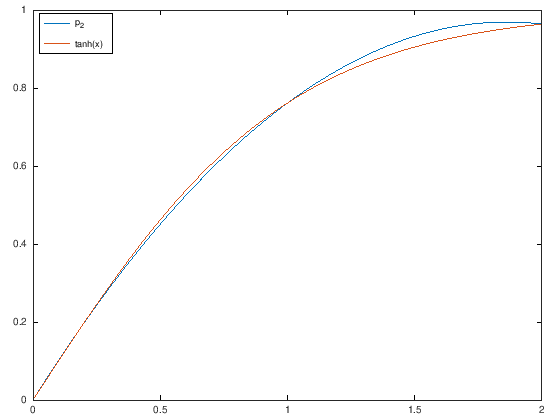

In [5]:
plot(xx, p2, xx, tanh(xx))
legend("p_2", "tanh(x)", "location", "northwest")

Para calcular el error manualmente, por la fórmula expuesta en el ítem **c**, debemos calcular la 3er derivada de $f=tanh(x)$:

$$f^{'''}=2(1-f^2)(3f^2-1)$$

- https://math.stackexchange.com/questions/2625632/nth-derivative-of-tanh
- https://www.fq.math.ca/Papers1/45-4/quartboyadzhiev04_2007.pdf

In [132]:
u = (0.6-xi(1))*(0.6-xi(2))*(0.6-xi(3));
fac3 = 6;
xa = 0; xb = 2;
ep = 0.6;#(xa+xb)/2;
deriv3 = 2*(1-tanh(ep)^2)*(3*(tanh(ep)^2)-1);

# comparamos los errores manual y exacto
err_manual = u*deriv3/fac3
err_exacto = tanh(0.6)-p2(xx==0.6)

err_manual = -0.010738
err_exacto =  0.012994


- Comparemos con el caso lineal

Como tenemos 3 puntos; $x_1, x_2, x_3$; tendremos dos segmentos donde realizar la interpolación lineal de Lagrange, es decir, entre dos puntos tendremos el siguiente polinomio:

$$p_1(x) = y_1L_1(x) + y_2L_2(x)$$

y

$$L_1 = \frac{(x-x_2)}{(x_1-x_2)}$$


$$L_2 = \frac{(x-x_1)}{(x_2-x_1)}$$



In [107]:
function [L1, L2] = lagr1(x,x1,x2)
    L1 = (x-x2)/(x1-x2);
    L2 = (x-x1)/(x2-x1);
end

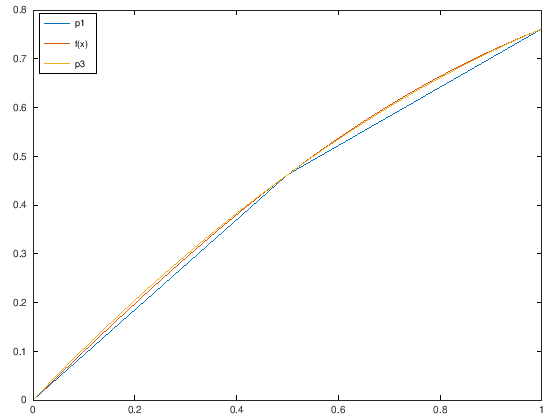

In [108]:
dx = 0.01;
# segmento x en dos partes sin solaparlas
xs1 = xi(1):dx:xi(2)-dx;
xs2 = xi(2):dx:xi(3);

# calculo los términos de lagrange lineales para cada segmento
[L1s1,L2s1] = lagr1(xs1,xi(1), xi(2));
[L1s2,L2s2] = lagr1(xs2,xi(2), xi(3));

# obtengo cada polinomio local de lagrange
ps1 = f(1)*L1s1 + f(2)*L2s1;
ps2 = f(2)*L1s2 + f(3)*L2s2;

# concateno los polonimios y el dominio
p1 = [ps1, ps2];
xt = [xs1, xs2];

# ploteo
plot(xt,p1, xt, tanh(xt), xx,p3)
legend("p1","f(x)", "p3", "location", "northwest")

### Problema 2: polinomios de Hermite

- **Verificar las fórmulas**: Utilizar las condiciones de contorno para llegar a 

$$q_0(t) = t^3-2t^2+t$$

$$q_1(t) = t^3-t^2$$

$$h_0(t) = 2t^3-3t^2+1$$

$$h_1(t) = 2t^3-3t^2$$

- **Cálculo**

In [3]:
function [h0,q0,h1,q1] = hermite(t)
    t2 = t.*t; t3 = t2.*t;
    h0 = 2*t3 - 3*t2 + 1;
    q0 = t3 - 2*t2 + t;
    h1 =-2*t3 + 3*t2;
    q1= t3 - t2;
end

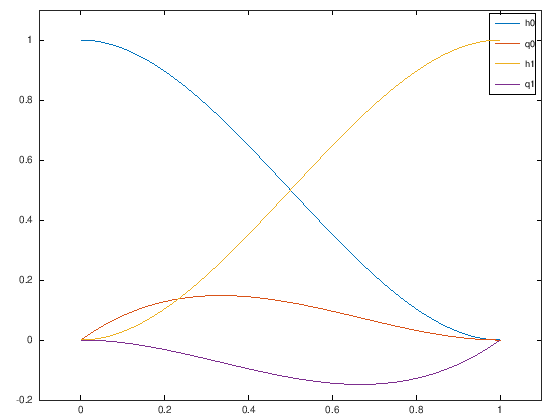

In [66]:
xa = 0.; 
xb = 1.; 
x =[xa:0.01:xb];
# ojo, aca no hay drama porque 0<= x <=1, sino hay que mapear
[h0, q0, h1, q1] = hermite(x); 

plot(t,h0,t,q0, t, h1, t, q1)
legend("h0", "q0","h1","q1")
axis([-0.1,1.1,-0.2,1.1])

**Aplique la interpolación de Hermite para**

- **a)** $f(x)=e^x$, para x en [0,1]

In [67]:
x = 0:0.01:1;
f = exp(x);
fprima = f;

t0 = 1;
t1 = length(x);

In [68]:
ph=h0*f(t0) + q0*fprima(t0)+h1*f(t1) + q1*fprima(t1);

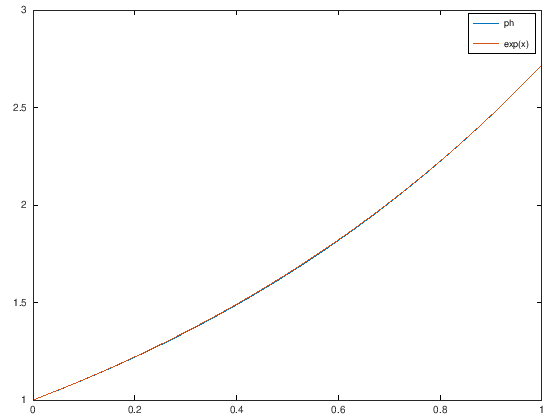

In [71]:
plot(x,ph,x,f)
legend("ph","exp(x)")

- **b)** $f(x)=tanh(x)$, x en [-1.5, 1.5]

$$f'(x) = 1 - tanh^2(x)$$

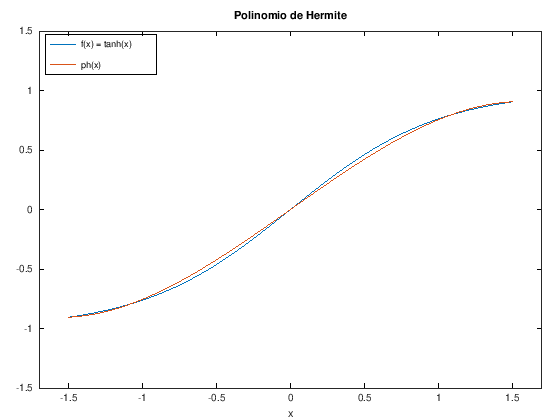

In [14]:
xa = -1.5; 
xb =  1.5; 
x  = [xa:0.01:xb];

# MAPEAMOS: normaliza el intervalo -> 0..1
t = (x-xa)/(xb-xa);

# invocamos a hermite con dominio mapeado!!
[h0, q0, h1, q1] = hermite(t); 

# funcion y su derivada
f = tanh(x);
fprima = 1-tanh(x).^2;

# índice de primer y última posición de t
t0 = 1;
t1 = length(t);

# polinomio de hermite
ph=h0*f(t0) + q0*fprima(t0) + h1*f(t1) + q1*fprima(t1);

# graficamos ambos usando el dominio original ahora
plot(x,f,x,ph)
legend("f(x) = tanh(x)","ph(x)","location", "northwest")
title("Polinomio de Hermite")
axis([-1.7,1.7,-1.5,1.5])
xlabel("x")



- **c)** Evalue el error de ambas aproximaciones en un punto fijo, intermedio. Fíjese de tomar un punto que coincida exactamente con la discretización elegida (es decir, elija un punto donde efectivamente Ud haya evaluado el polinomio)

Veremos el error en x=0.74, que se ubica en la posición 225:

In [118]:
x(225)

ans =  0.74000


In [122]:
error = f(225) - ph(225)

error =  0.030537


In [146]:
acos(cos(1))

ans =  1.00000


### Problema 3

- 1 y 2 hechos en hoja a mano
- **3)** Calcule y grafique el caso especial $$\psi_{n+1}=x(x-1)(x-2)\cdots(x-n)$$

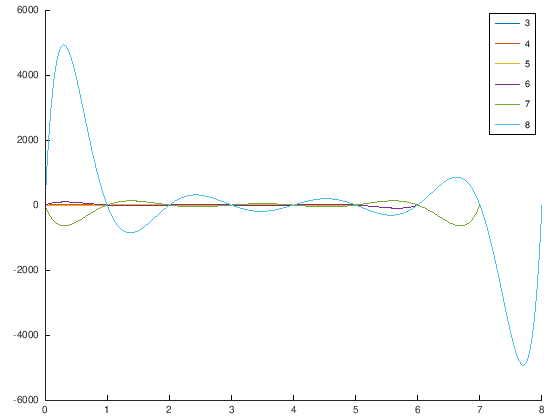

In [173]:
hold on;

for n=3:8
    x=0:0.01:n;
    # vector de 1's pq es una productoria
    psi = ones(1,length(x));
    for ni=0:n
        psi = psi.*(x-ni);
    endfor
    plot(x,psi,strcat("-;",num2str(n)," ;"))
end